### 3.2.2 Classification and regression with a two-layer perceptron

#### 3.2.2 Classification of linearly non-separable data

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def generateSubsets(n,scenario,shuffle=1, verbose=1, pattern=1):
    mu_A = np.array([1.0, 0.3])
    mu_B = np.array([0.0, -0.1])
    sigma_A = 0.2
    sigma_B = 0.3
    
    class_A=np.zeros((2,int(n)))
    class_B=np.zeros((2,int(n)))
    class_A[0]= np.concatenate((np.random.randn(1,int(0.5*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.5*n))*sigma_A+mu_A[0]),axis=1)
    class_B[0]= np.random.randn(1,int(n))*sigma_B +mu_B[0]
    class_A[1]= np.random.randn(1,int(n))*sigma_A +mu_A[1]
    class_B[1]= np.random.randn(1,int(n))*sigma_B +mu_B[1]     
  
    if shuffle:
        patterns=np.concatenate((class_A,class_B),axis=1)
        patterns = np.concatenate((patterns,np.ones((1,patterns.shape[1]))))
        targets=np.concatenate((np.ones(n),-np.ones(n)))

        if scenario == 0:
            patterns = patterns
            targets = targets
            validation_patterns = []
            validation_targets = []

        #50% of A and 100% of B
        if scenario == 1:
            validation_patterns = patterns[:,0:int(n/2)-1]
            validation_targets = targets[0:int(n/2)-1]
            patterns = patterns[:,int(n/2):2*n-1]
            targets = targets[int(n/2):2*n-1]
        
        #50% of B and 100% of A
        if scenario == 2:
            validation_patterns = patterns[:,int((3*n)/2):2*n-1]
            validation_targets = targets[int((3*n)/2):2*n-1]
            patterns = patterns[:,0:int((3*n)/2)-1]
            targets = targets[0:int((3*n)/2)-1]
        
        #Scenario 3 makes no sense!
        '''
        if scenario == 3:
            c_a = np.zeros((2,0.2*int(n)))
            c_b = np.zeros((2,0.8*int(n)))
            
            a_i = 0
            b_i = 0
            for i in range(n):
                if patterns[1,i] < 0 and c_a[1, 0.2*int(n)-1] == 0:
                    c_a[:,a_i] = patterns[:,i]
                    a_i+= 1
                elif patterns[1,i] > 0 and c_b[1, 0.8*int(n)-1] == 0:
                    c_b[:,b_i] = patterns[:,i]
                    b_i+=1
            
            validation_patterns = patterns[:,n:2*n-1]
            validation_targets = targets[:,n:2*n-1]
            
            patterns = np.concatenate((c_a,c_b), axis=1)
            targets = 
            '''
        
        
        i = np.arange(patterns.shape[1])
        np.random.shuffle(i)
        patterns=patterns[:,i] 
        targets=targets[i]
        #print(patterns)
        #print(targets)
    else:
        patterns = np.concatenate((class_A,class_B),axis=1)
        targets = np.array([np.ones(n,),-np.ones(n,)])
        targets = np.ravel(targets)

    if verbose:
        #Plotting classes if desired
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt.legend(handles=[plt_A, plt_B])
        plt.show()



    if pattern:
        return patterns, targets, validation_patterns, validation_targets
    else:
        return class_A, class_B

In [17]:
def error_mse(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((Y-T)**2))

def accuracy(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.sum(abs(T-Y)/2)/len(T)

def phi(x):
    return 2/(1+np.exp(-x))-1


def phi_prime(x):
    return 0.5*((1+phi(x))*(1-phi(x)))

def forward_pass(X,W,V):
    #print(W.shape)
    #print(X.shape)
    H = phi(np.matmul(W,X))
    #print(H.shape)
    H=np.vstack([H,np.ones(np.shape(H)[1])])
    #print(H.shape)
    #print(V.shape)
    O = phi(np.matmul(V,H))
    #print(O.shape)
    return H,O

def backward_pass(O,T,H,V,hidden):
    delta_o = np.multiply((O-T),phi_prime(O))
    #print("hej hopp")
    #print(V.shape)
    #print(delta_y.shape)
    #print(phi_prime(H).shape)
    delta_h = np.multiply(np.matmul(np.transpose(V),delta_o),phi_prime(H))
    delta_h = delta_h[0:hidden]
    return delta_o, delta_h

def update_weights(X,H,W,V,eta,delta_o, delta_h,dw,dv,alpha):
    dw = alpha*dw-(1-alpha)*np.matmul(delta_h,np.transpose(X))
    dv = alpha*dv - (1-alpha)*np.matmul(delta_o,np.transpose(H))
    W = W + dw*eta
    V = V + dv*eta
    return W,V,dw,dv

def backprop(eta,X,T,W,V,hidden,epochs,alpha=0.9):
    weights1 = []
    weights2 = []
    mse_errors = []
    accuracys = []
    #acc = 0
    dw = np.zeros(W.shape)
    dv = np.zeros(V.shape)
    #print(eta,X,T,W,V,hidden,epochs)
    for i in range(epochs):
        weights1.append(W)
        weights2.append(V)
        H,O = forward_pass(X,W,V)
        mse = error_mse(T,O)
        mse_errors.append(mse)
        acc = accuracy(T,O)
        accuracys.append(acc)
        delta_o,delta_h = backward_pass(O,T,H,V,hidden)
        W,V,dw,dv = update_weights(X,H,W,V,eta,delta_o,delta_h,dw,dv,alpha)
        #print(H)
        #print("print")
        #print(Y)
    weights1.append(W)
    weights2.append(V)
        
    return weights1, weights2,mse_errors,accuracys


In [18]:
def weights_init_MLP(n_in,n_out,scale,hidden):
    W = scale*np.random.randn(hidden,n_in)
    V = scale*np.random.randn(n_out,hidden+1)
    return W,V

In [29]:
def predict(validation,W,V, classification = True):
        #print(validation)
        #print(W.shape)
        _, prediction = forward_pass(validation,W,V)
        
        return prediction

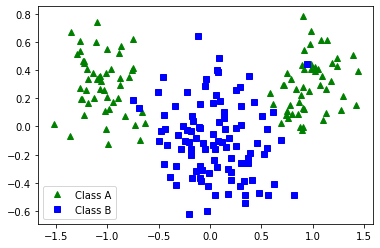

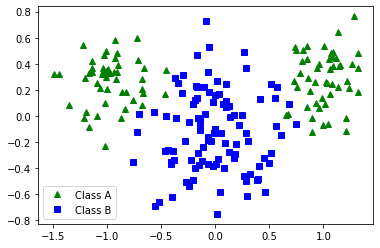

In [37]:
eta = 1e-4
nData = 100
n_out = 1
scale = 1e-2
hidden_perceptrons = [2,3,4,5,6,7,8]
scenarios = [1,2]
epochs = 4000

mse_holder = np.zeros((len(hidden_perceptrons),epochs))
mse_val_holder = np.zeros((len(hidden_perceptrons),epochs))
acc_holder = np.zeros((len(hidden_perceptrons),epochs))
acc_val_holder = np.zeros((len(hidden_perceptrons),epochs))

mse_data = np.zeros((len(hidden_perceptrons),epochs,len(scenarios)))
mse_val_data = np.zeros((len(hidden_perceptrons),epochs,len(scenarios)))
acc_data = np.zeros((len(hidden_perceptrons),epochs,len(scenarios)))
acc_val_data = np.zeros((len(hidden_perceptrons),epochs,len(scenarios)))


#FOR ALL DIFFERENT SUBSETS
for s,dataset in enumerate(scenarios):
    X,T,val_X,val_T = generateSubsets(nData,dataset,verbose=1)
    n_in = np.shape(X)[0]
    
    #FOR ALL DIFFERENT NUMBER OF PERCEPTRONS IN HIDDEN LAYER
    for j,nPerceptron in enumerate(hidden_perceptrons):
        W,V = weights_init_MLP(n_in,n_out,scale,nPerceptron)
        #W = scale*np.random.randn(hidden_perceptrons,np.shape(X)[0])
        #V = scale*np.random.randn(n_out,hidden_perceptrons+1)
        
        #TRAINING
        W_train,V_train,mse,acc = backprop(eta,X,T,W,V,nPerceptron,epochs)

        mse_val = []
        acc_val = []
        W_train = np.array(W_train)
        V_train = np.array(V_train)
        
        #print(W_train[i,:,:].shape)
        
        #PREDICTION
        for i in range(1,W_train.shape[0]):
            p = predict(val_X,W_train[i,:,:],V_train[i,:,:])
            mse_val.append(error_mse(val_T,p))
            acc_val.append(accuracy(val_T,p))
            
        mse_holder[j,:] = mse
        mse_val_holder[j,:] = np.array(mse_val)
        acc_holder[j,:] = acc
        acc_val_holder[j,:] = np.array(acc_val)
    
    mse_data[:,:,s] = mse_holder
    mse_val_data[:,:,s] = mse_val_holder
    acc_data[:,:,s] = acc_holder
    acc_val_data[:,:,s] = acc_val_holder
        
    

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


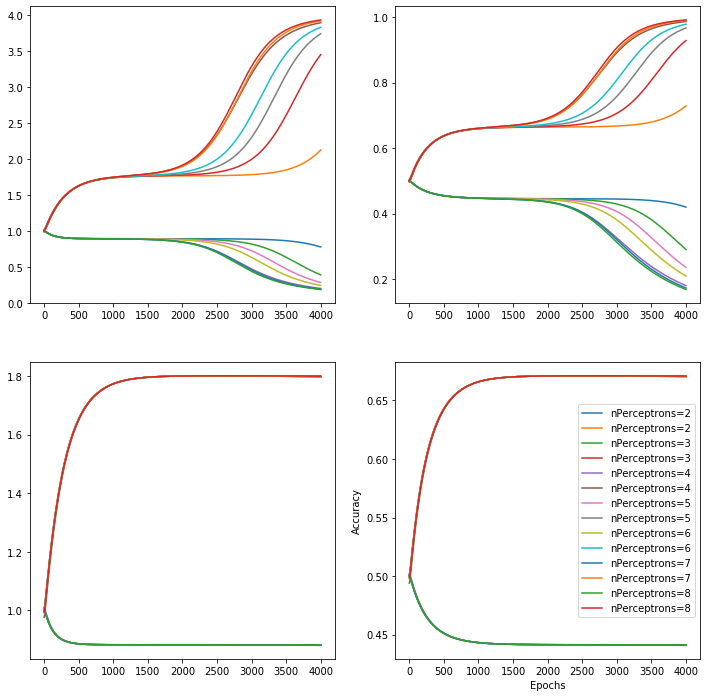

In [39]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
for plots in range(mse_data.shape[0]):
    ax1.plot(np.linspace(0,epochs,epochs),mse_data[plots,:,0], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    ax1.plot(np.linspace(0,epochs,epochs),mse_val_data[plots,:,0], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    
    ax2.plot(np.linspace(0,epochs,epochs),acc_data[plots,:,0], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    ax2.plot(np.linspace(0,epochs,epochs),acc_val_data[plots,:,0], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    
    ax3.plot(np.linspace(0,epochs,epochs),mse_data[plots,:,1], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    ax3.plot(np.linspace(0,epochs,epochs),mse_val_data[plots,:,1], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    
    ax4.plot(np.linspace(0,epochs,epochs),acc_data[plots,:,1], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    ax4.plot(np.linspace(0,epochs,epochs),acc_val_data[plots,:,1], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
                 

plt.show()

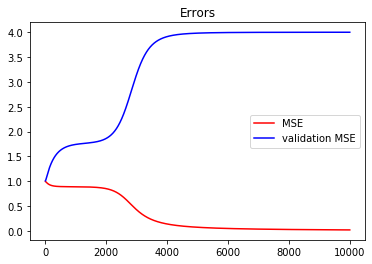

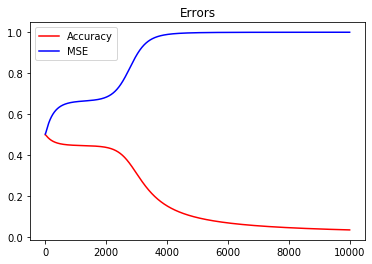

In [13]:
plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
plt_mse_val, = plt.plot(np.linspace(0,epochs,epochs),mse_val,'b', label='validation MSE')
plt.legend(handles=[plt_mse,plt_mse_val])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()
plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'r',label='Accuracy')
plt_acc_val, = plt.plot(np.linspace(0,epochs,epochs),acc_val,'b', label='MSE')
plt.legend(handles=[plt_acc,plt_acc_val])
plt.title('Errors')
plt.show()